In [148]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

In [149]:
vinyl_smiles = "OC(F)=C(Cl)Br"
monomer = Chem.MolFromSmiles(vinyl_smiles)
water = Chem.MolFromSmiles("O")

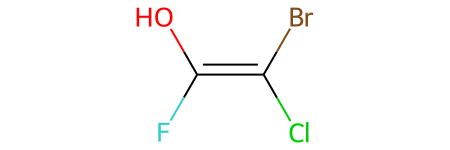

In [150]:
monomer

In [151]:
water = Chem.MolFromSmiles("[I][At]")

### Initiation (vinyl)

In [152]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[C:1]=[C:2].[I]-[At]>>[I]-[C:1]-[C:2]-[At]"
)

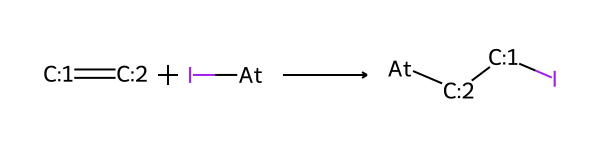

In [153]:
initiation

In [154]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((monomer, water))[0][0]

[16:05:43] reactant 1 has no mapped atoms.


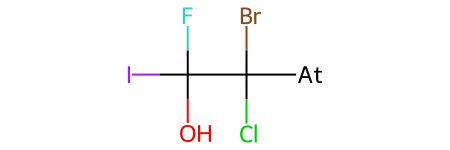

In [155]:
dp1

### Propagation reaction (should work for everything)

In [156]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[I:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)

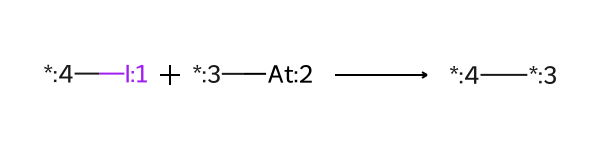

In [157]:
prop

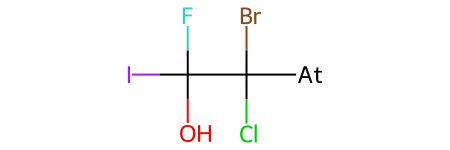

In [158]:
dp1

In [159]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[16:05:43] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


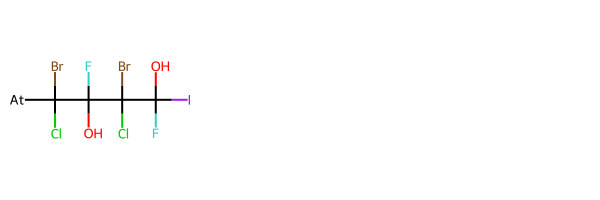

In [160]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=3)

### Replace end groups with CH3s

In [161]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replaceI = rdChemReactions.ReactionFromSmarts(
    "[I:1]>>[C:1]"
)

In [162]:
replaceAt.RunReactantInPlace(products[0])

True

In [163]:
replaceI.RunReactantInPlace(products[0])

True

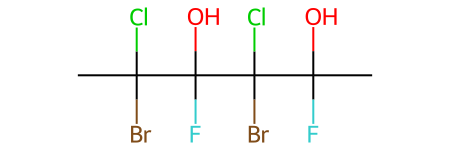

In [164]:
products[0]